In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Kernel PCA
Let's take a dataset $\mathbf{X}$ where

* $d$: no. of features
* $n$: no. of datapoints
$$
X=\left [
\begin{array}{ccccc}
    | & | & | & & | \\
    x_1 & x_2 & x_3 & \ldots & x_4 \\
    | & | & | & & |
\end{array}
\right ]
$$

In [2]:
X = np.array([[1, 1],[2, 4],[-1, 1],[-2, 4]]).T

In [3]:
X

array([[ 1,  2, -1, -2],
       [ 1,  4,  1,  4]])

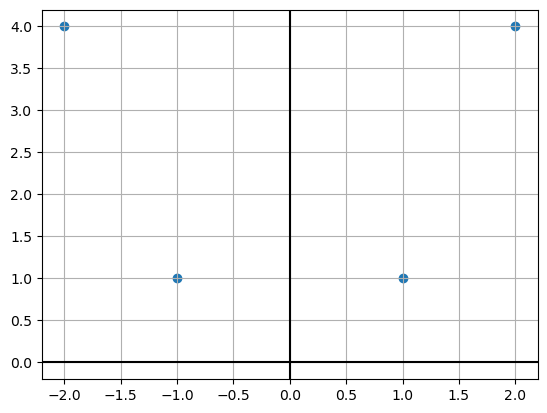

In [4]:
plt.scatter(X[0, :], X[1, :])
plt.axhline(c='k')
plt.axvline(c='k');
plt.grid();

### Step 1: Calculate $\mathbf{K} \in \mathbb{R}^{n \times n}$ using a kernel function where $\mathbf{K}_{ij}=k(x_i,x_j)$.

In [5]:
def polynomial_kernel(A,B,k): 
    # (x^T x' + 1)^p
    return(A.T @ B + 1)**k

K_poly=polynomial_kernel(X,X,2)

In [7]:
K_poly

array([[  9,  49,   1,   9],
       [ 49, 441,   9, 169],
       [  1,   9,   9,  49],
       [  9, 169,  49, 441]])

### Step 2: Center the kernel using the following formula.
$$
\mathbf{K}^C=\mathbf{K}-\mathbf{I}\mathbf{K}-\mathbf{K}\mathbf{I}+\mathbf{I}\mathbf{K}\mathbf{I}
$$
where $\mathbf{K}^C$ is the centered kernel, and $\mathbf{I} \in \mathbb{R}^{n \times n}$ where all the elements are $\frac{1}{n}$.

In [11]:
def center_K(K): # K is n x n
    n=K.shape[0]
    I=np.ones((n,n)) / n
    # K - IK - KI + IKI # (n x n) - (n x n) - n x n + n x n
    return K - I@K - K@I + I@K@I

K_centered=center_K(K_poly)
    
    

In [12]:
K_centered

array([[ 67., -43.,  59., -83.],
       [-43., 199., -83., -73.],
       [ 59., -83.,  67., -43.],
       [-83., -73., -43., 199.]])

### Step 3: Compute the eigenvectors $\{\beta _1, \beta _2, \ldots, \beta _n\}$ and eigenvalues $\{n\lambda _1, n\lambda _2, \ldots, n\lambda _n\}$ of $K^C$ and normalize to get
$$
\forall u \hspace{2em} \alpha _u = \frac{\beta _u}{\sqrt{n \lambda _u}}
$$

In [24]:
lam,beta= np.linalg.eigh(K_centered)
lam, beta = lam[::-1][:-1], beta[:,::-1][:,:-1]

In [25]:
lam,beta

(array([277.9275172, 252.       ,   2.0724828]),
 array([[ 0.10365278, -0.5       , -0.69946844],
        [ 0.69946844,  0.5       ,  0.10365278],
        [-0.10365278, -0.5       ,  0.69946844],
        [-0.69946844,  0.5       , -0.10365278]]))

In [30]:
alpha=beta/np.sqrt(lam.reshape((1,-1)))

In [31]:
alpha

array([[ 0.00621749, -0.03149704, -0.48587288],
       [ 0.0419568 ,  0.03149704,  0.0720005 ],
       [-0.00621749, -0.03149704,  0.48587288],
       [-0.0419568 ,  0.03149704, -0.0720005 ]])

### Step 3: Compute $\sum _{j=1}^{n}\mathbf{\alpha }_{kj}\mathbf{K}_{ij}^{C} \ \ \forall k$

\begin{equation*}
\mathbf{x}_{i} \in \mathbb{R}^{d}\rightarrow \left[\begin{array}{ c c c c }
\sum\limits _{j=1}^{n}\mathbf{\alpha }_{1j}\mathbf{K}_{ij}^{C} & \sum\limits _{j=1}^{n}\mathbf{\alpha }_{2j}\mathbf{K}_{ij}^{C} & \dotsc  & \sum\limits _{j=1}^{n}\mathbf{\alpha }_{nj}\mathbf{K}_{ij}^{C}
\end{array}\right]
\end{equation*}

In [32]:
X_prime=K_centered@alpha
X_prime

array([[  1.72801191,  -7.93725393,  -1.00696319],
       [ 11.66094908,   7.93725393,   0.14921979],
       [ -1.72801191,  -7.93725393,   1.00696319],
       [-11.66094908,   7.93725393,  -0.14921979]])

# Week 2 programming assignment

In [51]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

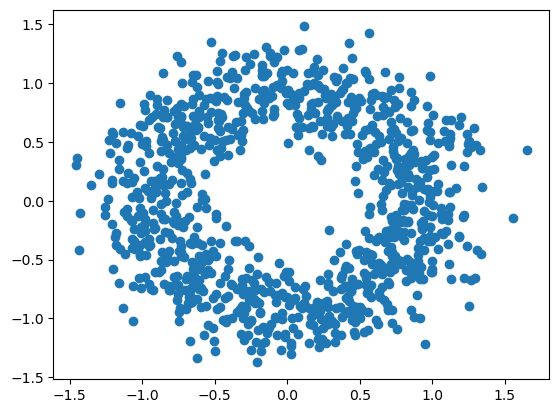

In [52]:
#plotting the dataset
plt.scatter(X[:,0],X[:,1])

In [53]:
X.shape

(1000, 2)

In [54]:
y.shape

(1000,)

## Problem 
Find the kernel matrix $K$ using the polynomial kernel with degree $2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [55]:
#X is n x d, K-> n x n
def poly_kernel(X,p):
    return (X@X.T + 1 )**p

K=poly_kernel(X,2)
n=K.shape[0]
print(np.sqrt((K**2).sum()) / (n))


2.096195646589988


## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [56]:
def gaussian_kernel(X,y,s):
    return np.exp(-np.linalg.norm((X-y))**2)/(2*(s**2))

def RBF_kernel(X,sigma):
    n=X.shape[0]
    return np.array([gaussian_kernel(X[i], X[j], sigma) for i in range(n) for j in range(n)]).reshape(n, n)

In [57]:
K1=RBF_kernel(X,2)
print(np.sqrt((K1 ** 2).sum()) / (n))

0.05492863922775459


## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 4. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [58]:
def K_centered(K):
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  return K
KC = K_centered(K)
print(np.sqrt((KC ** 2).sum()) / (1000))

1.4517985176976844


# Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\dfrac{1}{n}\sum_{i = 1}^{n} |\alpha_i| + \dfrac{1}{n}\sum_{i = 1}^{n} |\beta_i|$$

In [59]:
def Projection(M):
    eigval, eigvec = np.linalg.eigh(M)
    lambda_1, lambda_2 = eigval[-1], eigval[-2]
    alpha_1, alpha_2 = eigvec[:, -1]/ (np.linalg.norm(eigvec[:, -1])*np.sqrt(lambda_1)), eigvec[:, -2]/(np.linalg.norm(eigvec[:, -2])*np.sqrt(lambda_2))
    return alpha_1.dot(M), alpha_2.dot(M)
    #return eigvec[:, -1], eigvec[-2]


In [60]:
pc1, pc2 = Projection(KC)
print((np.abs(pc1).sum()+ np.abs(pc2).sum())/len(pc2))

1.744726799095336
